## Crop Production in India

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('/content/crop_production.csv')

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


Checking null values:

In [14]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

There are total 2616 missing values.

Hence, this cannot be imputed using regular means such as average, median or mode.

Our current order of priority is to predict the missing values.
The next few steps comprise the trial and error method of figuring out the best alternative to do so.

In [ ]:
df.nunique()

State_Name          18
District_Name      356
Crop_Year           19
Season               6
Crop               103
Area             26378
Production       31268
dtype: int64

In [ ]:
df.Production.value_counts()

100.0       2565
0.0         2132
1.0         2043
2.0         1496
200.0       1323
            ... 
56041.0        1
96159.0        1
39291.0        1
844764.0       1
120500.0       1
Name: Production, Length: 31268, dtype: int64

Grouping crop by area. To see if we get any information

In [ ]:
pd.DataFrame({'MEAN': df.groupby(['Crop'])['Area'].mean().round(1), 
              'MIN' : df.groupby(['Crop'])['Area'].min(), 
              'MAX' : df.groupby(['Crop'])['Area'].max()}).reset_index()

,Crop,MEAN,MIN,MAX
0,Arcanut (Processed),7205.8,6.0,27070.0
1,Arecanut,5394.4,1.0,51689.0
2,Arhar/Tur,9684.4,0.8,429589.0
3,Atcanut (Raw),7205.8,6.0,27070.0
4,Bajra,19696.1,1.0,387500.0
...,...,...,...,...
98,Water Melon,29.1,1.0,373.0
99,Wheat,44473.5,1.0,299053.0
100,other fibres,3200.0,132.0,6268.0
101,other misc. pulses,412.6,1.0,2970.0


Plots of Production with respect to Area.

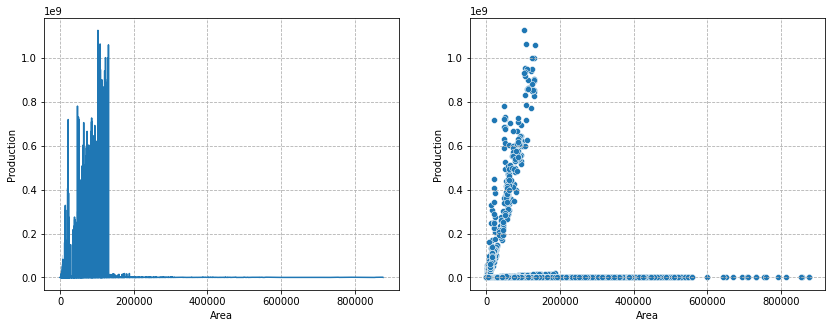

In [ ]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.lineplot(data=df, x=df.Area, y=df.Production)
plt.grid(True, linestyle = "--")
plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df.Area, y=df.Production)
plt.grid(True, linestyle = "--")

In [15]:
df.shape

(246091, 7)

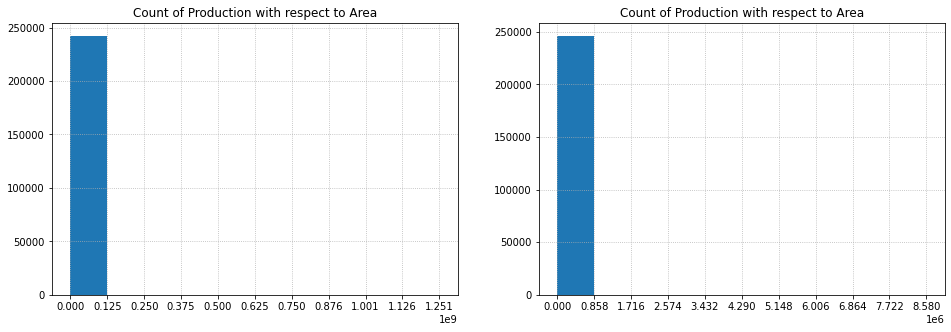

In [16]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
n, bins, patches = plt.hist(df.Production)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Production with respect to Area")

plt.subplot(1,2,2)
n, bins, patches = plt.hist(df.Area)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Production with respect to Area");

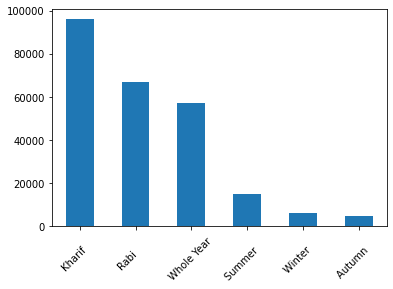

In [18]:
pd.Series(df['Season']).value_counts().plot(kind="bar")
plt.xticks(rotation = 45);